# High-dimensional data analysis- HW 1
#### Group 8:

In [1]:
# imports packages 
import sklearn
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
from scipy.sparse.linalg import svds
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import random

In [2]:
# define seed so we get the same result
random.seed(300)
np.random.seed(300)

-----------------------------------
## Question 2- LSI

In [3]:
# get the example that we will work on
example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
# convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
# convert the collection to data frame and show the first rows
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [4]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [5]:
# apply the svd so we get the singular values and vectors: U - documents, V- words
U,S,V = svds(A=dtm.astype(float),k=2)

In [6]:
print ('the singular values are\n',S,'\n')
print ('the U singular vectors are\n',U,'\n')
print ('the V singular vectors are\n',V,'\n')

the singular values are
 [2.14559669 2.88718938] 

the U singular vectors are
 [[-0.22208598 -0.54463788]
 [ 0.56623808 -0.69822409]
 [ 0.21748399 -0.1102019 ]
 [-0.13849341 -0.1020712 ]
 [-0.56401528 -0.4314778 ]
 [-0.17763866 -0.01315189]
 [-0.46249738 -0.08332855]] 

the V singular vectors are
 [[ 0.36526998 -0.06454774 -0.29834872 -0.16805553 -0.47842759 -0.36637885
  -0.08279219 -0.36637885  0.00103598 -0.06454774  0.10136294  0.42430629
  -0.21555653]
 [-0.28000449 -0.03535314 -0.03341673 -0.22399261 -0.17830709 -0.33808509
  -0.00455526 -0.33808509 -0.39128084 -0.03535314 -0.03816927 -0.67230992
  -0.02886148]] 



In [7]:
# multiply the singular vectors of docs with the singular values
docs = U*S
docs

array([[-0.47650694, -1.57247271],
       [ 1.21491855, -2.01590517],
       [ 0.46663292, -0.31817376],
       [-0.297151  , -0.29469888],
       [-1.21014931, -1.24575812],
       [-0.38114092, -0.03797199],
       [-0.99233284, -0.2405853 ]])

In [8]:
# get the x,y in 2 lists (because the 2 dimension)
docs_xs = [w[0] for w in docs]
docs_ys = [w[1] for w in docs]

In [9]:
# change it into dataframe
docs_svd_df=pd.DataFrame(docs.T,index = ["component_1","component_2"],columns =example)
docs_svd_df

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
component_1,-0.476507,1.214919,0.466633,-0.297151,-1.210149,-0.381141,-0.992333
component_2,-1.572473,-2.015905,-0.318174,-0.294699,-1.245758,-0.037972,-0.240585


In [10]:
# multiply the singular values with the singular vectors of words
words = S*V.T
words

array([[ 0.78372206, -0.80842599],
       [-0.13849341, -0.1020712 ],
       [-0.64013603, -0.09648044],
       [-0.36057939, -0.64670908],
       [-1.02651265, -0.51480635],
       [-0.78610126, -0.97611568],
       [-0.17763866, -0.01315189],
       [-0.78610126, -0.97611568],
       [ 0.0022228 , -1.12970189],
       [-0.13849341, -0.1020712 ],
       [ 0.21748399, -0.1102019 ],
       [ 0.91039018, -1.94108606],
       [-0.46249738, -0.08332855]])

In [11]:
# get the x,y in 2 lists (because the 2 dimension)
words_xs = [w[0] for w in words]
words_ys = [w[1] for w in words]

In [12]:
# change it into dataframe
words_svd_df=pd.DataFrame(words.T,index = ["component_1","component_2"],columns =vectorizer.get_feature_names())
words_svd_df

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.783722,-0.138493,-0.640136,-0.360579,-1.026513,-0.786101,-0.177639,-0.786101,0.002223,-0.138493,0.217484,0.910390,-0.462497
component_2,-0.808426,-0.102071,-0.096480,-0.646709,-0.514806,-0.976116,-0.013152,-0.976116,-1.129702,-0.102071,-0.110202,-1.941086,-0.083329


Populating the interactive namespace from numpy and matplotlib


C:\Users\Tamara\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


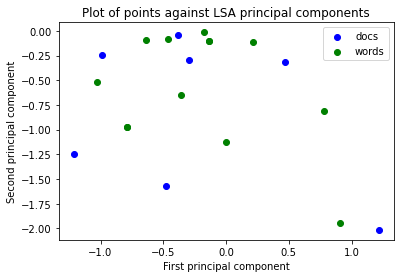

In [13]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(docs_xs,docs_ys,label='docs',color='b')
plt.scatter(words_xs,words_ys,label='words',c='g')
plt.legend()
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


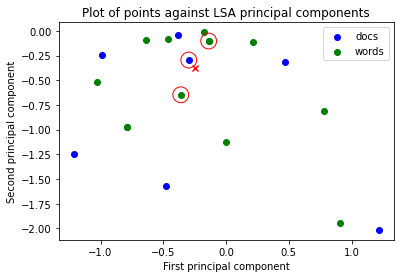

The closest document is:


'Data science is fun'

In [14]:
# this a function receives 2 words query,locates the query in the embedded space and returns the name of the closest documents.
def draw_new_words(query,words_svd_df,docs_svd_df):
    global docs_xs,docs_ys,words_xs,words_ys
    x=0
    y=0
    counter=len(query)
    for elem in query:
        # check if we have the word
        if elem not in words_svd_df.columns: 
            return 'Error, unfamiliar word'
        else:
            x+=words_svd_df[elem]['component_1']
            y+=words_svd_df[elem]['component_2']
    # calc the avarge x, y of the query
    x/=counter
    y/=counter
    q=np.array([x,y])
    min_dist=np.inf # intial the distance
    doc_name=None
    # find the closest document 
    for doc in docs_svd_df.columns:
        if np.linalg.norm(q-np.array(docs_svd_df[doc]))<min_dist: # if the disance is smaller update the distance and the document name
            min_dist=np.linalg.norm(q-docs_svd_df[doc])
            doc_name=doc
    # plot the figure
    %pylab inline
    figure()
    plt.scatter(docs_xs,docs_ys,label='docs',color='b') # plot the document in blue
    plt.scatter(words_xs,words_ys,label='words',c='g')  # plot the words in green
    plt.scatter(x,y,marker='x',c='r') # mark the query with X sign in red
    plt.scatter(words_svd_df[query[0]]['component_1'],words_svd_df[query[0]]['component_2'],s=250,marker='o',facecolors='none',edgecolors='r') # mark the word 
    plt.scatter(words_svd_df[query[1]]['component_1'],words_svd_df[query[1]]['component_2'],s=250,marker='o',facecolors='none',edgecolors='r') # mark the word
    plt.scatter(docs_svd_df[doc_name]['component_1'],docs_svd_df[doc_name]['component_2'],s=250,marker='o',facecolors='none',edgecolors='r') # mark the clossest document
    plt.legend()
    xlabel('First principal component')
    ylabel('Second principal component')
    title('Plot of points against LSA principal components')
    show()
    print('The closest document is:')
    return doc_name
            
        
draw_new_words(['data','fun'],words_svd_df,docs_svd_df)           
            
    

# Q3

In [33]:
def myDM(data,C,d):
    square_matrix=squareform(pdist(data))          # Calculating a distances matrix
    max_value=square_matrix.max()                  # Find the maximum value of the matrix
    np.fill_diagonal(square_matrix,max_value)      # Replace th ediagonal with the maximum value of the matrix
    epsilon = max(square_matrix.min(axis=1))       # Calculating epsilon
    W = np.exp((-square_matrix**2)/(C*epsilon))    # Computing W
    D=np.sum(W,axis=1)                             # 
    P = W/(D[:,None])                              # Calculate the Markov matrix
    U,S,V = np.linalg.svd(P) # The np.linalg returns the values in descending order. Therefore, we didn't sort it.

    return U[:,1:d+1]*S[1:d+1]

In [34]:
df=pd.read_csv('two_circles_data.csv',header=None) # read the data
df.head()

,0,1
0,0.348610,-0.787010
1,1.303500,-1.088600
2,-0.067487,0.032684
3,-1.307500,1.993000
4,-0.760840,-0.921330


In [53]:
new_df = myDM(df,0.5,3) 

In [54]:
new_df

array([[ 0.00361063, -0.0008312 ,  0.01058482],
       [ 0.00239596, -0.00053448,  0.00785159],
       [ 0.00421124, -0.00091999,  0.01137613],
       ...,
       [-0.0210917 ,  0.02076912,  0.01338034],
       [-0.02101493,  0.02088746,  0.01330986],
       [-0.02090285,  0.0209712 ,  0.01321746]])

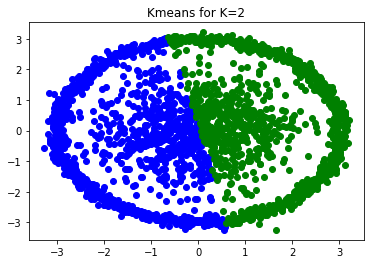

In [55]:
kmeans = KMeans(n_clusters=2) # use K-mean with k=2
# predict the 2 groups and plot each group in difftent color 
label = kmeans.fit_predict(df) 
df['label']=label
label1=df[df['label']==1]
label0=df[df['label']==0]
figure()
plt.scatter(label1[0],label1[1],color='b')
plt.scatter(label0[0],label0[1],c='g')
title('Kmeans for K=2')
show()

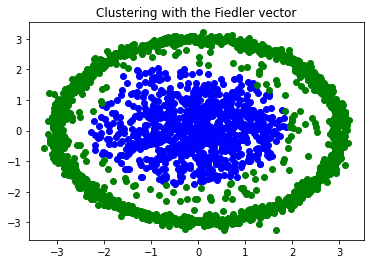

In [57]:
# for C=0.5
df['Fiedler_vector']=new_df[:,0]  # take the first vector to be the Fiedler_vector
df['label']=df.Fiedler_vector.apply(lambda x: 0 if x<0 else 1) # label for each point is the sign of the Fiedler_vector
# plot the points in the original data 
label1=df[df['label']==1]
label0=df[df['label']==0]
figure()
plt.scatter(label1[0],label1[1],color='b')
plt.scatter(label0[0],label0[1],c='g')
title('Clustering with the Fiedler vector')
show()

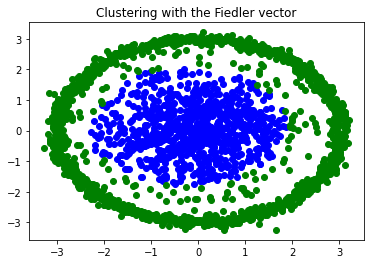

In [60]:
new_df = myDM(df,2,3) # for C=2 
df['Fiedler_vector']=new_df[:,0]  # take the first vector to be the Fiedler_vector
df['label']=df.Fiedler_vector.apply(lambda x: 0 if x<0 else 1) # label for each point is the sign of the Fiedler_vector
# plot the points in the original data 
label1=df[df['label']==1]
label0=df[df['label']==0]
figure()
plt.scatter(label1[0],label1[1],color='b')
plt.scatter(label0[0],label0[1],c='g')
title('Clustering with the Fiedler vector')
show()

# Q4

In [19]:
df=pd.read_csv('Arcene_data.csv',header=None) # read the data
label=pd.read_csv('Arcene_label.csv',header=None) # read the labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354


In [20]:
# this function uses the numpy function randn to create the random projection matrix
def projected_matrix(df,d):
    R = np.random.randn(d, 10000)
    l2norm=np.sqrt((R*R).sum(axis=1))
    R = R/l2norm.reshape(d,1)
    return np.matmul(df.to_numpy(),R.T)

In [21]:
d=800
P=projected_matrix(df,d)

In [22]:
# we choose points 22 and 43
point_22_p =P[22,:] 
point_43_p = P[43,:] 
point_22_df = df.iloc[22,:] 
point_43_df = df.iloc[43,:] 
dist_p = numpy.linalg.norm(point_22_p-point_43_p) # distance of the point in the projection df
dist_df = numpy.linalg.norm(point_22_df-point_43_df) # distance of the point in the original df

print('The Euclidean distance in the original space is :',dist_df)
print('The Euclidean distance in the reduced space is :',dist_p)
print('The ratio between the two distances is :',dist_df/dist_p) 

The Euclidean distance in the original space is : 12360.842487468239
The Euclidean distance in the reduced space is : 3404.8140765679436
The ratio between the two distances is : 3.6304016047560466


In [23]:
# this function get a df and project the df with the number of d's.
# then we compute 10 folds, for each fold we use fit with svm and calc the accuracy of the test for the original data and the projected data.
# finally we return the mean accuracy. 
def compare_accuracy(df,label,d):
    P=pd.DataFrame(projected_matrix(df,d)) # get the projected df
    acc_proj_lst=[] 
    acc_origin_lst=[]
    kf=KFold(n_splits=10,shuffle=True) # run 10 times kfold
    for train_index,test_index in kf.split(df):
        # the train and test data of the original and the projected data
        origin_train, origin_test = df.iloc[train_index], df.iloc[test_index]
        P_train, P_test = P.iloc[train_index], P.iloc[test_index]
        train_labels=label.iloc[train_index]
        test_labels=label.iloc[test_index]
        
        # use SVM classifier
        clf_origin=svm.SVC()
        clf_P=svm.SVC()
        clf_origin.fit(origin_train,train_labels.values.ravel())
        clf_P.fit(P_train,train_labels.values.ravel())
        
        # predict the test set
        origin_predict = clf_origin.predict(origin_test)
        P_predict = clf_P.predict(P_test)

        # calc the accuracy and append the the list of the accuracy 
        acc_origin=accuracy_score(test_labels[0], origin_predict)
        acc_origin_lst.append(acc_origin)
        acc_P=accuracy_score(test_labels[0], P_predict)
        acc_proj_lst.append(acc_P)
    print('The average accuracy on the original data is :',sum(acc_origin_lst)/len(acc_origin_lst))
    print('The average accuracy on the projected data is :',sum(acc_proj_lst)/len(acc_proj_lst))
    # return the mean accuracy 
    return (sum(acc_origin_lst)/len(acc_origin_lst),sum(acc_proj_lst)/len(acc_proj_lst))


In [24]:
compare_accuracy(df,label,800)

The average accuracy on the original data is : 0.6900000000000001
The average accuracy on the projected data is : 0.6799999999999999


(0.6900000000000001, 0.6799999999999999)

In [25]:
origin_acc_for_d=[]
proj_acc_for_d=[]
# calc the accuracy for each d
for d in range(500,1100,100):
    result=compare_accuracy(df,label,d)
    origin_acc_for_d.append(result[0])
    proj_acc_for_d.append(result[1])

The average accuracy on the original data is : 0.6599999999999999
The average accuracy on the projected data is : 0.6299999999999999
The average accuracy on the original data is : 0.66
The average accuracy on the projected data is : 0.62
The average accuracy on the original data is : 0.6599999999999999
The average accuracy on the projected data is : 0.61
The average accuracy on the original data is : 0.7
The average accuracy on the projected data is : 0.6499999999999999
The average accuracy on the original data is : 0.64
The average accuracy on the projected data is : 0.6300000000000001
The average accuracy on the original data is : 0.6399999999999999
The average accuracy on the projected data is : 0.62


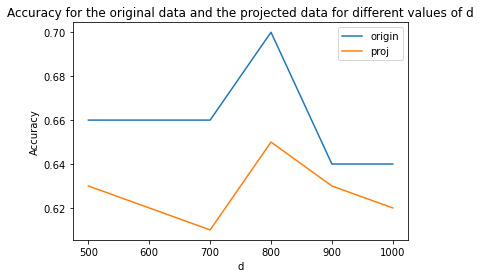

In [26]:
# plot the accuracy of the original and projected data for each d
dic={'origin':origin_acc_for_d,'proj':proj_acc_for_d,'d':[500,600,700,800,900,1000]}
pd.DataFrame(dic).set_index('d').plot()
ylabel('Accuracy')
title('Accuracy for the original data and the projected data for different values of d')
show()